# State space models
A [state space representation](https://en.wikipedia.org/wiki/State-space_representation#State_variables) of a dynamical model relates the set of output variables $\mathbf{y}_t$ to the set of (possibly unobserved) state-variables $\mathbf{z}_t$ using first-order differential equations when time is continuous or difference equations when time is discrete. Such representations are useful because they provide a summary of the systems dynamics. In this lecture we will assume that time is discrete, and learn about the linear state space model.

**Remarks**:
1. **Jargon**: 
    1. The *state variables* are the smallest possible set of variables that can represent the entire state of the system at any given time.
    2. State space models are also referred to as state space systems.
    3. Writing a model as a state space system is referred to as the *state space representation* of the model.
    4. In some cases the state space representation facilitate estimation, so the terms *representation* and *model* are used interchangeably. 

In [1]:
# Load packages
using Distributions  # Work with standard probability distributions
using Interact       # Create widgets 
using Plots          # Create plots
using LinearAlgebra  # Use extra linear algebra functions such as the identity matrix I(n)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16382296066678869017\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-473080285249537550\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16382296066678869017\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Linear state space model
The general form of the linear state space model is given by two equations

$$
\begin{align}
\mathbf{y}_t &= \mathbf{A}\mathbf{z}_t + \mathbf{B}\mathbf{e}_t \\
\mathbf{z}_t &= \mathbf{C}\mathbf{z}_{t-1} + \mathbf{D}\mathbf{u}_t \\
\end{align}
$$

in which
1. $\mathbf{y}_t$ is a $n\times 1$ vector of observations
2. $\mathbf{z}_t$ is a $k\times 1$ vector of (possibly unobserved) states
3. $\mathbf{e}_t$ and $\mathbf{u}_t$ are $n\times 1$ iid random vectors
4. $\mathbf{A}$ is a $n\times k$ matrix, sometimes called the *output* (or *system*) *matrix*.
5. $\mathbf{B}$ is a $n\times n$ *observation volatility matrix*
6. $\mathbf{C}$ is a $k\times k$ *state transition matrix*
7. $\mathbf{D}$ is a $k\times 1$ *state volatility matrix*

The first equation is known as the *observation* (or *measurement*) *equation* and the second equation is known as the *state* (or *transition*) *equation*.

A variety of dynamical models can be represented in terms of the linear state space model. Common examples include:
1. Autoregressive (AR) model
2. Vector Autoregressive (VAR) model

**Example**: Recall that the AR(p) model is given by
$$
y_t = \rho_0 + \rho_1 y_{t-1} + \dots + \rho_p y_{t-p} + \varepsilon_t
$$

The state space representation of the AR(p) model is given by defining the observation equation as
$$
y_t = \rho_0 + 
\begin{bmatrix} 
1 & 0 & \dots & 0
\end{bmatrix}
\begin{bmatrix} 
y_t - \rho_0\\
y_{t-1} - \rho_0\\
\vdots\\
y_{t-p} - \rho_0\\
\end{bmatrix}
$$
and the state equation as
$$
\begin{bmatrix} 
y_t - \rho_0\\
y_{t-1} - \rho_0\\
\vdots\\
y_{t-p} - \rho_0\\
\end{bmatrix}
=
\begin{bmatrix}
\rho_1 & \rho_2 & \dots & \rho_{p-1} & \rho_p \\
1 & 0 & \dots & 0 & 0 \\
0 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
y_{t-1} - \rho_0\\
y_{t-2} - \rho_0\\
\vdots\\
y_{t-p} - \rho_0\\
\end{bmatrix}
+
\begin{bmatrix} 
\varepsilon_t - \rho_0\\
0\\
\vdots\\
0\\
\end{bmatrix}
$$

In this lecture we learn about a commonly used linear state space model, known as the  unobserved components model.

# Unobserved components model
The *unobserved components (UC) model* decomposes a time series $y_t$ into a non-stationary trend component $\tau_t$ and a cyclical component $\varepsilon_t$. The simplest variant of the UC model is the *local level* model which is defined by
$$
\begin{align}
y_t &= \tau_{t} + \varepsilon_t, \quad \varepsilon_t \sim N(0,\sigma^2)\\
\tau_t &= \tau_{t-1} + u_t, \quad u_t \sim N(0,\omega^2)\\
\end{align}
$$
where $\varepsilon_t$ and $u_s$ are independent for all dates $t$ and $s$ and the initial condition $\tau_0$ is estimated. 

**Remarks**:
1. **Jargon**: Since both the observation and state equations are linear in the unobserved $\tau_t$ and both the error terms are Normally distributed, the local level model is a type of *linear Gaussian state space model*.
2. **Trend-cycle decompositions**: The local level model is a simple trend-cycle decomposition. [Morely, Nelson and Zivot (2003)](https://www.mitpressjournals.org/doi/abs/10.1162/003465303765299765) show that the [Beveridge-Nelson decomposition](https://stats.stackexchange.com/questions/80548/explaining-the-beveridge-nelson-decomposition) can be written as a UC model that allows for correlation between the trend and cycle innovations. [Grant and Chan (2016)](http://www.joshuachan.org/papers/output-gap-2M.pdf) show that the popular [Hodrick-Prescott (HP) filter](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter) can be written as a UC model in which the cyclical components are serially independent --- an assumption that is rejected by the data. This is one of many reasons [why you should never use the HP filter](https://www.mitpressjournals.org/doi/abs/10.1162/REST_a_00706).
3. **Linear regression**: Notice that the local level model can be viewed as a linear regression with a time-varying intercept, i.e. $x_{1,t}=1$ for all dates $t=1,\dots,T$, and $\beta_1 = \tau_t$. We can extend it to estimate.


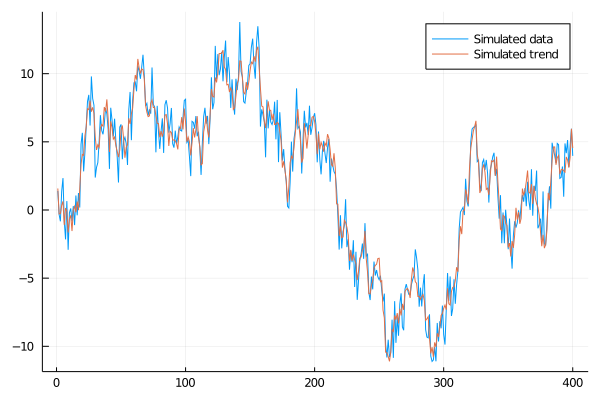

In [5]:
## Simulate data from the UC model
# Parameter values
true_sig2 = 1;    # measurement variance
true_omeg2 = 1; # state variance
true_tau0 = 1;    # initial state
T = 400; # no. of dates

# Storage
y = zeros(T); # storage vector
true_tau = zeros(T); # storage vector

# Initial conditions
true_tau[1] = true_tau0 + rand(Normal(0,sqrt(true_omeg2))); # initial state
y[1] =  true_tau[1] + rand(Normal(0,sqrt(true_sig2))); # initial obs

# Simulation
for t = 2:T
    true_tau[t] = true_tau[t-1] + rand(Normal(0,sqrt(true_omeg2))); # simulate state
    y[t] =  true_tau[t] + rand(Normal(0,sqrt(true_sig2))); # simulate obs
end

#Plot
x = collect(1:1:T);
data = y;
plot(x,data, label="Simulated data")
plot!(x,true_tau, label="Simulated trend")


## Estimation
To estimation the model we use matrix notation to stack the observation and state equations over all dates, $t=1,\dots,T$. 

The measurement equation is given by
$$
\mathbf{y} = \boldsymbol{\tau} + \boldsymbol{\varepsilon}
$$
in which $\mathbf{y}=[y_1,\dots,y_T]'$, $\boldsymbol{\tau}=[\tau_1,\dots,\tau_T]'$ and $\boldsymbol{\varepsilon}=[\varepsilon_1,\dots,\varepsilon_T]'$ are each $T\times 1$ vectors. This implies that 
$$
\mathbf{y}|\boldsymbol{\tau},\sigma^2\sim N(\boldsymbol{\tau},\boldsymbol{\Sigma})
$$
in which $\boldsymbol{\Sigma} = \sigma^2\mathbf{I}_T$.

Next, to stack the state equation, note that
$$
\begin{align}
\tau_1 &= \tau_0 + u_1\\
\tau_2 &= \tau_1 + u_2\\
       &\vdots\\
\tau_T &= \tau_{T-1} + u_T\\       
\end{align}
$$
Taking the $\tau_t$ $t=1,\dots,T-1$ to the left hand side gives
$$
\begin{align}
\tau_1 &= \tau_0 +  u_1\\
\tau_2 - \tau_1 &=  u_2\\
       &\vdots\\
\tau_T - \tau_{T-1} &= u_T\\       
\end{align}
$$
Writing this system as matrices gives
$$
\underset{\mathbf{H}}{\underbrace{\begin{bmatrix}
1 & 0 & 0 & \dots & 0\\
-1 & 1 & 0 & \dots & 0\\
0 & -1 & 1 & \dots & 0\\
0 & 0 & \ddots & \ddots & \vdots\\
0 & 0 & 0 & -1 & 1\\
\end{bmatrix}}}
\underset{\boldsymbol{\tau}}{\underbrace{\begin{bmatrix}
\tau_1\\
\tau_2\\
\tau_3\\
\vdots\\
\tau_T
\end{bmatrix}}}
=
\underset{\tilde{\boldsymbol{\alpha}}}{\underbrace{\begin{bmatrix}
\tau_0\\
0\\
0\\
\vdots\\
0
\end{bmatrix}}}
+
\underset{\mathbf{u}}{\underbrace{\begin{bmatrix}
u_1\\
u_2\\
u_3\\
\vdots\\
u_T
\end{bmatrix}}}
$$
or more compactly
$$
\mathbf{H}\boldsymbol{\tau} = \tilde{\boldsymbol{\alpha}} + \mathbf{u}
$$

Since [the determinant of a lower triangular matrix is equal to the product of it's diagonal elements](https://en.wikipedia.org/wiki/Triangular_matrix#Properties), it follows that $|\mathbf{H}|=1$ implying that it's invertible. Thus, 
$$
\boldsymbol{\tau} = \boldsymbol{\alpha} + \mathbf{H}^{-1}\mathbf{u}
$$
in which $\boldsymbol{\alpha} = \mathbf{H}^{-1}\tilde{\boldsymbol{\alpha}}$. This implies that 
$$\boldsymbol{\tau}|\omega^2,\tau_0 \sim N(\boldsymbol{\alpha},\boldsymbol{\Omega})$$
in which $\boldsymbol{\Omega} = \omega^2(\mathbf{H}'\mathbf{H})^{-1}$.

Taken together, these equations imply that the probability model representation of the UC model is given by
$$
\begin{align}
\mathbf{y}|\boldsymbol{\tau},\sigma^2 &\sim N(\boldsymbol{\tau},\boldsymbol{\Sigma})\\
\boldsymbol{\tau}|\omega^2,\tau_0 &\sim N(\boldsymbol{\alpha},\boldsymbol{\Omega})
\end{align}
$$

Estimating the UC model is therefore the same as estimating the parameters of two multivariate normal distributions which unknown mean and covariance. The only conceptual difference is that the mean of distribution is an unobserved state as opposed to a parameter. Nonetheless, we can still estimate the states by sampling them in the same manner.

### Likelihood
Using the probability model representation, the likelihood is given by
$$
p(\mathbf{y}|\boldsymbol{\tau},\sigma^2) = (2\pi\sigma^2)^{-\frac{T}{2}}\exp(-\frac{1}{2\sigma^2}(\mathbf{y}-\boldsymbol{\tau})'(\mathbf{y}-\boldsymbol{\tau}))
$$

### Priors
We assume the following independent prior distributions
1. $\tau_0\sim N(m_0,v_0)$
2. $\sigma^2\sim IG(\nu_{0,\sigma},S_{0,\sigma})$
2. $\omega^2\sim IG(\nu_{0,\omega},S_{0,\omega})$

### Posterior
We will use a 4-block Gibbs sampler to simulate from the joint posterior distribution $p(\boldsymbol{\tau},\sigma^2,\omega^2,\tau_0|\mathbf{y})$ which cycles through:
1. $p(\boldsymbol{\tau}|\mathbf{y},\sigma^2,\omega^2,\tau_0)$
2. $p(\sigma^2|\mathbf{y},\boldsymbol{\tau},\omega^2,\tau_0)$
3. $p(\omega^2|\mathbf{y},\boldsymbol{\tau},\sigma^2,\tau_0)\propto p(\boldsymbol{\tau},\omega^2,\tau_0)p(\omega^2)$
4. $p(\tau_0|\mathbf{y},\boldsymbol{\tau},\sigma^2,\omega^2)\propto p(\boldsymbol{\tau},\omega^2,\tau_0)p(\tau_0)$

#### 1. Sampling $\boldsymbol{\tau}$
Note that 
$$
p(\boldsymbol{\tau}|\mathbf{y},\sigma^2,\omega^2,\tau_0)\propto p(\mathbf{y}|\boldsymbol{\tau},\sigma^2)p(\boldsymbol{\tau},\omega^2,\tau_0)
$$
which is the product of two multivariate normal densities. Using results from the linear regression model, we know that
$$
\boldsymbol{\tau}|\mathbf{y},\sigma^2,\omega^2,\tau_0\sim N(\hat{\boldsymbol{\tau}},\mathbf{D}_{\tau}^{-1})
$$ 
in which 
$\hat{\boldsymbol{\tau}}=\mathbf{D}_{\tau}^{-1}(\boldsymbol{\Sigma}^{-1}\mathbf{y} + \boldsymbol{\Omega}^{-1}\boldsymbol{\alpha})$ and $\mathbf{D}_{\tau}^{-1}=\boldsymbol{\Sigma}^{-1}+\boldsymbol{\Omega}^{-1}$.

#### 2. Sampling $\sigma^2$
$$
p(\sigma^2|\mathbf{y},\boldsymbol{\tau},\omega^2,\tau_0)\propto p(\mathbf{y}|\boldsymbol{\tau},\sigma^2)p(\sigma^2)
$$
which is the product of a multivariate normal density and an inverse-Gamma density. Using results from the linear regression model, we know that
$$
\sigma^2|\mathbf{y},\boldsymbol{\tau},\omega^2,\tau_0\sim IG(\nu_{\sigma},S_{\sigma})
$$
in which 
$\nu = \frac{T}{2}+\nu_{0,\sigma}$ and $S_{0,\sigma} = S_0 + (\mathbf{y}-\boldsymbol{\tau})'(\mathbf{y}-\boldsymbol{\tau})$.

#### 3. Sampling $\omega^2$
$$
p(\omega^2|\mathbf{y},\boldsymbol{\tau},\sigma^2,\tau_0)\propto p(\boldsymbol{\tau},\omega^2,\tau_0)p(\omega^2)
$$
which is the product of a multivariate normal density and an inverse-Gamma density. Using results from the linear regression model, we know that
$$
\omega^2|\mathbf{y},\boldsymbol{\tau},\sigma^2,\tau_0\sim IG(\nu_{\omega},S_{\omega})
$$
in which 
$\nu = \frac{T}{2}+\nu_{0,\omega}$ and $S_{0,\omega} = S_0 + (\boldsymbol{\tau}-\boldsymbol{\alpha})'\mathbf{H}'\mathbf{H}(\boldsymbol{\tau}-\boldsymbol{\alpha})$.

#### 4. Sampling $\tau_0$
Recall that the initial condition $\tau_0$ only appears in the first state equation
$$
\tau_1 = \tau_0 + u_1, \quad u_1 \sim N(0,\omega^2)
$$
This implies that $\tau_1\sim N(\tau_0 ,\omega^2) $. The conditional posterior distribution 
$$
p(\tau_0|\mathbf{y},\boldsymbol{\tau},\sigma^2,\omega^2)\propto p(\tau_1|\omega^2,\tau_0)p(\tau_0)
$$
is the product of two univariate normal distributions. Using results from the worked example on the AR with drift model, it follows that
$$
\tau_0|\mathbf{y},\boldsymbol{\tau},\sigma^2,\omega^2\sim N(\hat{\tau}_0,D_{\tau_0})
$$
in which 
$\hat{\tau}_0={D}_{\tau_0}(\frac{\tau_1}{\omega^2} + \frac{m_0}{v_0})$ and ${D}_{\tau_0}=(\frac{1}{\omega^2}+\frac{1}{v_0})^{-1}$.

### Computational points
#### Hyperparameters
The hyperparameters for the initial values are relatively unimportant provided that the variance $v_0$ is not extremely small (informative). In practice, the size will dependent on the scale of the data, but a unit variance is the default option.

On the other hand, the state variance $\omega^2$ controls the smoothness of the trend component and the hyperparameters can be chosen to reflect the desired smoothness. While setting $\nu_{0,\omega}=3$ is reasonable, in our experience, the scale parameter $S_0 = \mathbb{E}[\omega^2](\nu_{0,\omega}-1)$ can greatly influence the results. Choosing $\mathbb{E}[\omega^2]$ to be a small number generally results in a smooth, but relatively flat trend. In contrast, choosing $\mathbb{E}[\omega^2]$ to be large generally results in the trend exhibiting substantial time variation. This is because the state variance is inferred from the unobserved states $\tau_t$ which may have a weak-signal. With this in mind, [Amir-Ahmadi, Matthes and Wan (2020)](https://amstat.tandfonline.com/doi/full/10.1080/07350015.2018.1459302?casa_token=RG6wJLB-1vYAAAAA%3AM-2RxN3vw6Ui3hQ3HRTeqiPht88X7_BuKo3qsu0q6hK9UQ0QRopO1RG9-co58tEp-NFWgmi6r1NF) have recently proposed the use of a hierarchical model to estimate those hyperparameters jointly with all other parameters in the model.

In [7]:
# Estimate UC model
## Posterior analysis
# Data
y = data;       # Observations
T = size(y,1);  # Dates after removing initial conditions

# Controls
nburn = 1000;
ndraws = nburn + 1000;

# Prior for sig2
pri_nu1 = 3;
pri_S1 = 1*(pri_nu1-1); # sets E(pri_sig2) = 1
pri_sig2 = InverseGamma(pri_S1,pri_S1);

# Prior for omeg2
pri_nu2 = 3;
pri_S2 = 1*(pri_nu2-1); # sets E(pri_omeg2) = 1
pri_omeg2 = InverseGamma(pri_S2,pri_S2);

# prior for tau0
pri_m = 0;
pri_v = 100;

# Storage
s_tau = zeros(ndraws-nburn,T);
s_sig2 = zeros(ndraws-nburn,1);
s_omeg2 = zeros(ndraws-nburn,1);
s_tau0 = zeros(ndraws-nburn,1);

# Deterministic terms in posterior
post_nu1 = pri_nu1 + T/2;
post_nu2 = pri_nu2 + T/2;

# Difference matrix
H = I(T) - diagm(-1 => ones(T-1));
HH = H'*H;

# Gibbs Sampler
let 
MC_sigy2 = 1;
MC_omega2 = .1;
MC_tau0 = 0;

for loop in 1:ndraws
# local definitions to speed up code
alp = ones(T)*MC_tau0;
invSig = I(T)/MC_sigy2;
invOmega = HH/MC_omega2;

# Draw tau
    post_invD = invSig + invOmega;
    post_tauhat = post_invD\(invSig*y + invOmega*alp );
    MC_tau = post_tauhat + transpose(cholesky(Hermitian(post_invD)).L)\rand(Normal(0,1),T);

# Draw sig2
    post_S1 = pri_S1 + 0.5*(y-MC_tau)'*(y-MC_tau);
    MC_sig2 = rand(InverseGamma(post_nu1,post_S1));

# Draw omeg2
    post_S2 = pri_S2 +0.5*(MC_tau-alp)'*HH*(MC_tau-alp);
    MC_omeg2 = rand(InverseGamma(post_nu2,post_S2));

# Draw tau0
    post_v = 1/(1/MC_omega2 + 1/MC_sigy2);
    post_m = post_v*(MC_tau[1]/MC_omega2 + pri_m/pri_v);
    MC_tau0 = post_m + rand(Normal(0,sqrt(post_v)));

# Store
    if loop > nburn
        count_loop = loop - nburn;
        s_tau[count_loop,:] = transpose(MC_tau);
        s_sig2[count_loop] = MC_sig2;
        s_omeg2[count_loop] = MC_omeg2;
        s_tau0[count_loop] = MC_tau0;
    end
end
end 

In [ ]:
# Plot marginal posterior distributions
x = collect(0:0.1:5);
histogram(x,post_sig2, normalize=:pdf, title = "Posterior: sig2", legend = false)
plot!([true_sig2], seriestype="vline", legend = false)
p2a = plot!([post_sig2], seriestype="vline", legend = false)

histogram(x,post_omeg2, normalize=:pdf, title = "Posterior: omeg2", legend = false)
plot!([true_omeg2], seriestype="vline", legend = false)
p2b = plot!([post_omeg2], seriestype="vline", legend = false)

histogram(x,s_tao0, normalize=:pdf, title = "Posterior: tao0", label="Empirical pdf")
plot!([true_tao0], seriestype="vline", label="True value")
p2c = plot!([post_tao0], seriestype="vline", label="MC mean")

plot(p2a,p2b,p2c,layout = (1,3))



In [ ]:
# Plot states
x = collect(1:T);
plot(x,post_tau,label ="Estimated trend")
plot!(x,true_tau,label ="True trend")


# Conclusion
State space models are generally useful because they provide a summary of the systems dynamics. From a practical perspective, they facilitate the estimation of models with unobserved components, such as the local level model. The local level model can be viewed as a regression with a time-varying intercept. More generally, [Canova (1993)](https://www.sciencedirect.com/science/article/abs/pii/S0165188906800114) extends this set-up to a regression with time-varying coefficients. [Cogley and Sargent (2001)](https://www.journals.uchicago.edu/doi/pdfplus/10.1086/654451) extend the VAR to have time-varying parameters. 

Estimating linear state space models is extremely similar to estimating the linear regression model. The only conceptual difference is that the mean of the observation equation contains unobserved states. Nonetheless, they both amount to estimating the unknown mean and covariance of a multivariate normal distribution. We can therefore estimate the states using a Gibbs sampler in which the state equation acts as a prior distribution. 

Note that this idea is not yet common practice. To estimate the unobserved states in linear state space models, people have traditionally relied on [*Kalman Filter*](https://en.wikipedia.org/wiki/Kalman_filter) based algorithms such as [Carter and Kohn (1994)](https://www.jstor.org/stable/2337125?seq=1) and [Durbin and Koopman (2002)](https://www.jstor.org/stable/4140605?seq=1). That being said, the idea of bypassing the Kalman filter in favor of directly sampling the states has become increasing popular. A highly influential paper in this literature is [Chan and Jeliazkov (2009)](http://www.joshuachan.org/papers/statespace1.pdf). In two empirical applications on macroeconomic data, they show how the precision sampler can be used to estimate (1) a time varying parameter VAR model and (2) a dynamic factor model. 

## Recommended reading
1. For those looking to learn how to estimate a time-varying parameter VAR an excellent textbook treatment is provided in Chapter 8.2 of Joshua C. C. Chan's [Notes on Bayesian Macroeconometrics](http://joshuachan.org/notes_BayesMacro.html). 
2. Chan and Strachan (2020) have a manuscript on [Bayesian State Space Models in Macroeconometrics](http://www.joshuachan.org/papers/JES_StateSpaceModels.pdf)
